In [1]:
import matchms as mms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**YOU CAN STEAL FROM NIST!**

1. Go to https://webbook.nist.gov/sitemap_index.xml
1. Download all sitemaps
1. Go though each https://webbook.nist.gov/cgi/inchi/**
1. Use link like https://webbook.nist.gov/cgi/inchi?JCAMP=C109999&amp;Index=0&amp;Type=Mass
1. store all values locally
1. profit?

2024-11-17 16:22:22,000:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


Text(0.5, 1.0, 'NIST reference')

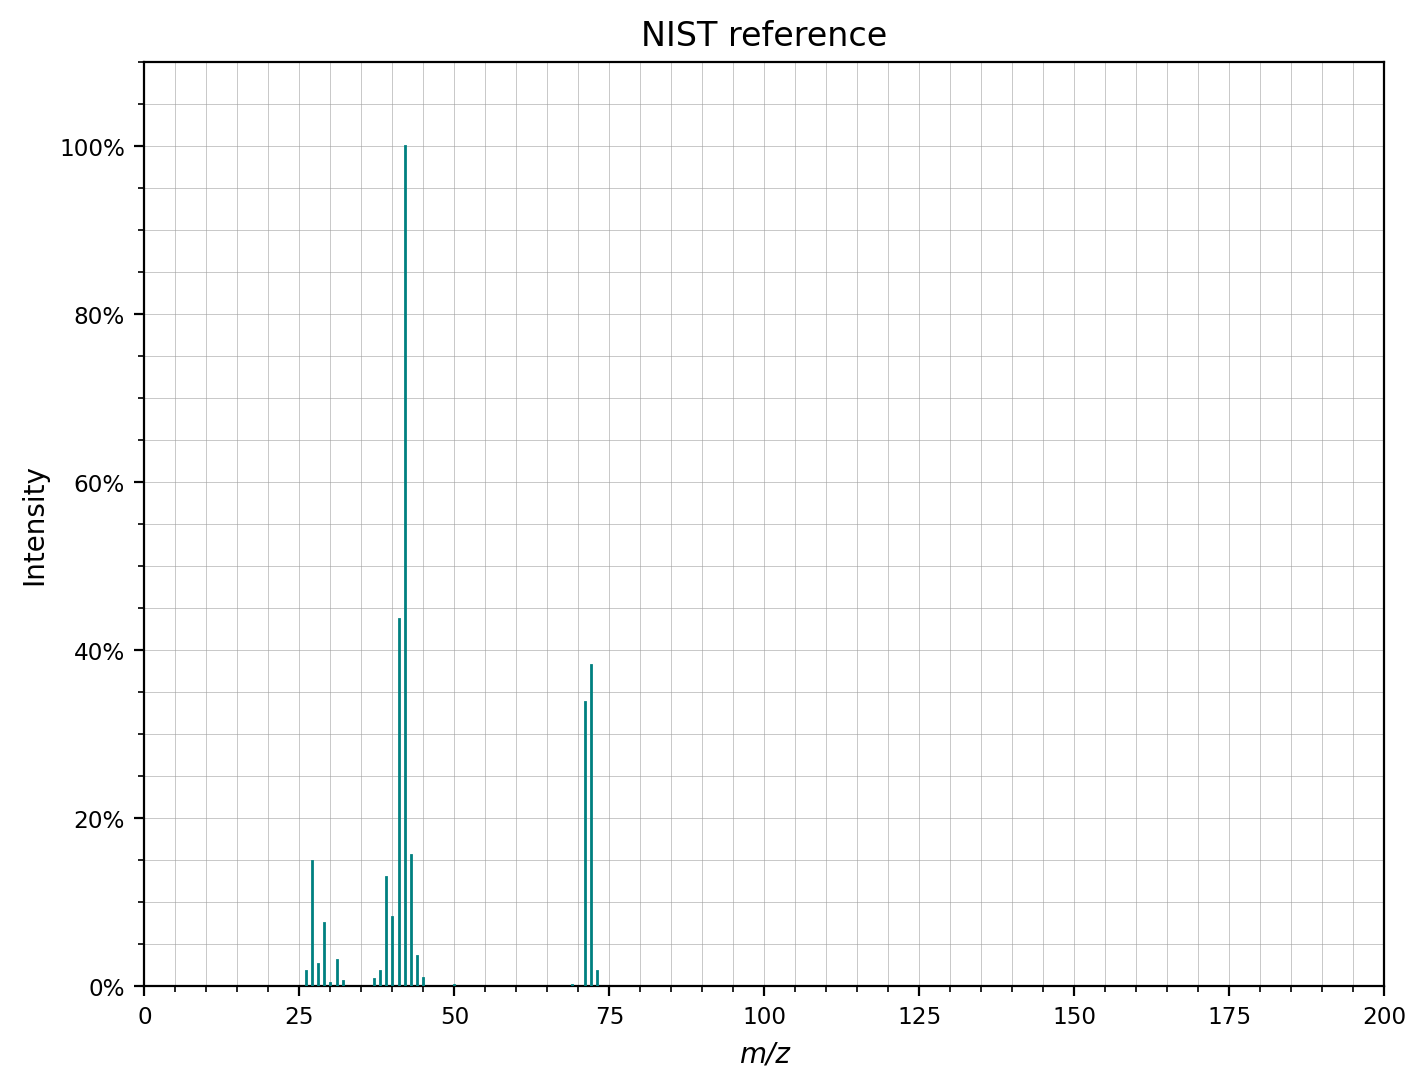

In [6]:
# Manual way to extract mz/intensity pairs from jdx file.

nist = 'EXAMPLE/CID/Tetrahydrofuran/nist_reference.jdx'
s = ' '.join(open(nist, 'r').readlines()[26:-1])
s = [[float(e) for e in s.split(',')] for s in s.replace('\n',' ').split()]
mz, ints = np.array(s).T
nist = mms.Spectrum(mz=mz, intensities=ints, metadata={'compound_name': 'Tetrahydrofuran NIST'})
nist.plot()
plt.title("NIST reference")

2024-11-17 16:22:23,799:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.


Text(0.5, 1.0, 'QCXMS spectrum')

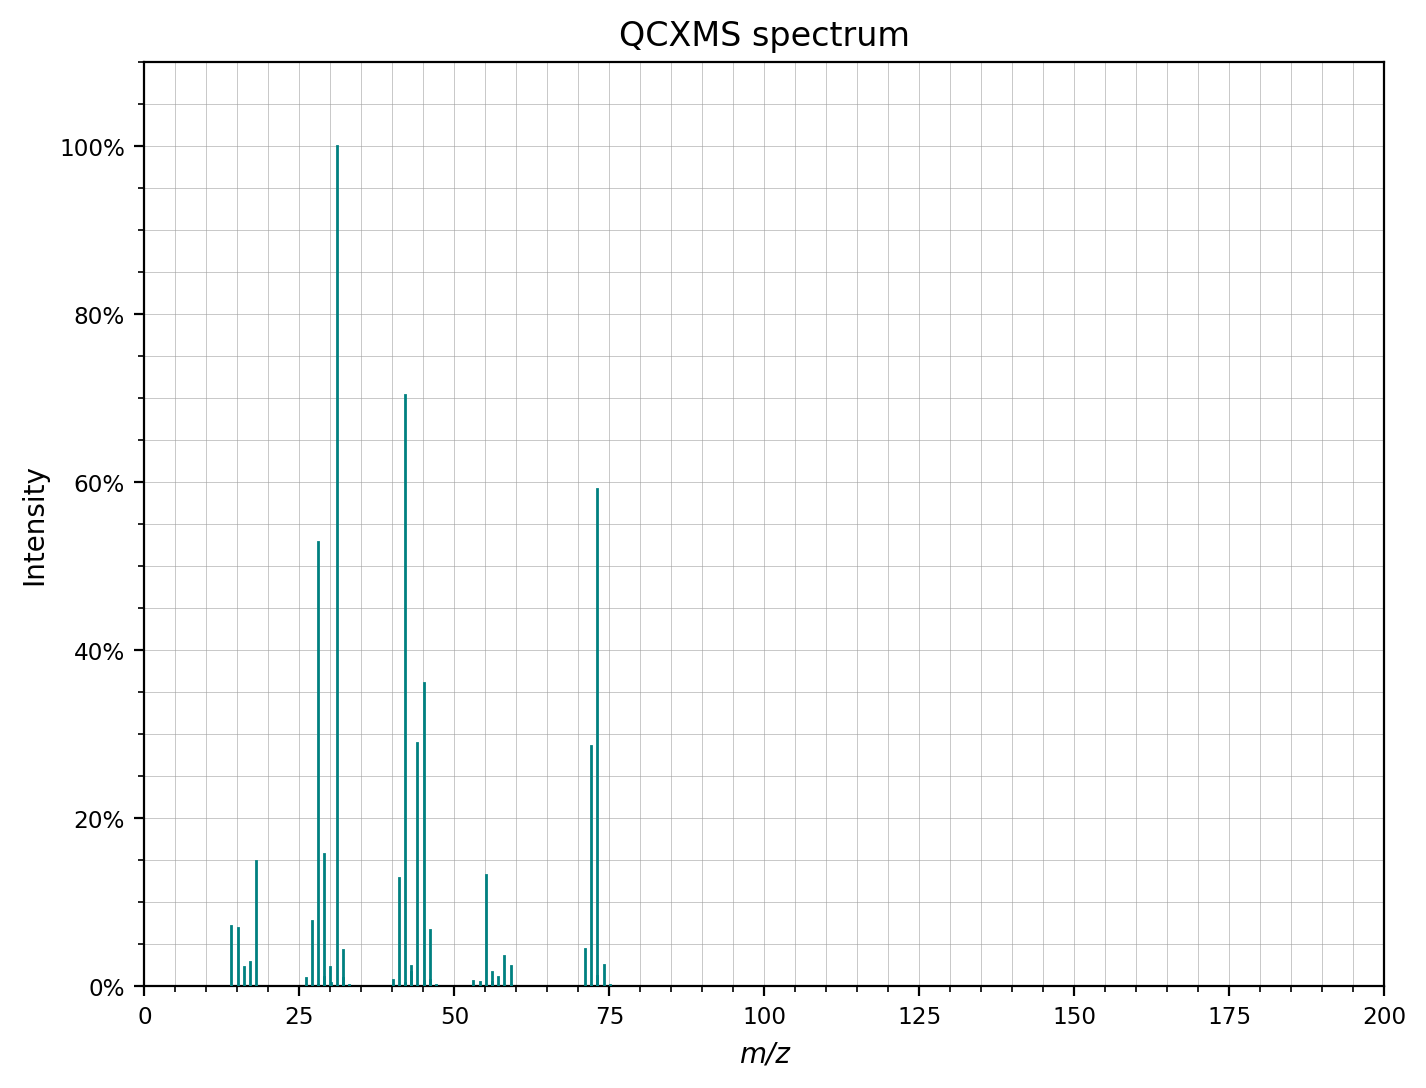

In [7]:
# Read result.csv
r = pd.read_csv('runs/current/result.csv', header=None).astype(float)
qcms = mms.Spectrum(r[0].values, r[1].values, metadata={'compound_name': 'Tetrahydrofuran QCxMS'})
qcms.plot()
plt.title("QCXMS spectrum")

<Axes: title={'center': 'Spectrum comparison'}, xlabel='m/z', ylabel='Intensity'>

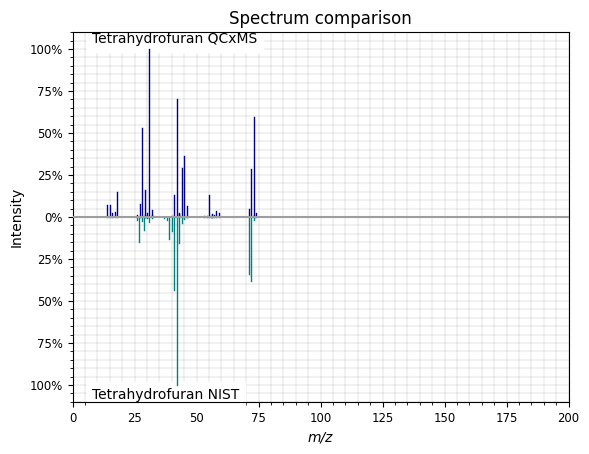

In [8]:
mms.plotting.plot_spectra_mirror(
    qcms,
    nist,
)